In [6]:
import os
import numpy as np 
import pandas as pd 
from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

4convlayers_0.1731.csv
4L_pseudolabeling_0.1763.csv
sub201801102212renset50_0.17478.csv
sub201801111028inceptionv3_0.1869.csv
sub201801111144_xception_0.1841.csv
sub201801111534ResNet50_aver_0.1689.csv
VGG16pretrain_0.1613.csv



In [7]:
sub_path = "./input"
all_files = os.listdir(sub_path)

# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "is_iceberg_" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()

,id,is_iceberg_0,is_iceberg_1,is_iceberg_2,is_iceberg_3,is_iceberg_4,is_iceberg_5,is_iceberg_6
0,5941774d,0.165616,0.040880,0.003044,0.106100,1.483769e-05,1.758107e-01,0.035234
1,4023181e,0.440642,0.239020,0.990582,0.302233,6.918396e-05,4.762523e-01,0.248752
2,b20200e4,0.157010,0.000118,0.006188,0.000325,7.721067e-12,6.421022e-07,0.008674
3,e7f018bb,0.998759,0.948407,0.999728,0.995213,9.999982e-01,9.970161e-01,0.988385
4,4371c8c3,0.199500,0.028982,0.998925,0.045377,1.825918e-06,2.452419e-02,0.365645


In [3]:
# check correlation
concat_sub.corr()

,is_iceberg_0,is_iceberg_1,is_iceberg_2,is_iceberg_3,is_iceberg_4,is_iceberg_5,is_iceberg_6
is_iceberg_0,1.000000,0.938561,0.622708,0.813792,0.945130,0.908958,0.920000
is_iceberg_1,0.938561,1.000000,0.578125,0.833962,0.978560,0.932555,0.937474
is_iceberg_2,0.622708,0.578125,1.000000,0.573847,0.584820,0.610635,0.607147
is_iceberg_3,0.813792,0.833962,0.573847,1.000000,0.839452,0.820762,0.797363
is_iceberg_4,0.945130,0.978560,0.584820,0.839452,1.000000,0.938131,0.935658
is_iceberg_5,0.908958,0.932555,0.610635,0.820762,0.938131,1.000000,0.900926
is_iceberg_6,0.920000,0.937474,0.607147,0.797363,0.935658,0.900926,1.000000


In [3]:
# get the data fields ready for stacking
concat_sub['is_iceberg_max'] = concat_sub.iloc[:, 1:7].max(axis=1)
concat_sub['is_iceberg_min'] = concat_sub.iloc[:, 1:7].min(axis=1)
concat_sub['is_iceberg_mean'] = concat_sub.iloc[:, 1:7].mean(axis=1)
concat_sub['is_iceberg_median'] = concat_sub.iloc[:, 1:7].median(axis=1)

In [5]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.75
cutoff_hi = 0.25

# MinMax + Mean Stacking LB 0.1357

In [6]:
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_mean']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_mean_3.csv', 
                                        index=False, float_format='%.6f')

# MinMax + Median Stacking LB 0.1344

In [7]:
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_3.csv', 
                                        index=False, float_format='%.6f')

# set 0.7, 0.3

In [8]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.7
cutoff_hi = 0.3

# MinMax + Mean Stacking LB 0.1322

In [9]:
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_mean']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_mean_threshold_0.3_3.csv', 
                                        index=False, float_format='%.6f')

# MinMax + Median Stacking LB 0.1314

In [10]:
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.3_3.csv', 
                                        index=False, float_format='%.6f')

In [52]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.65
cutoff_hi = 0.35

# MinMax + Median Stacking LB 0.1317

In [53]:
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.35_4.csv', 
                                        index=False, float_format='%.6f')

# new threshold

# MinMax + Median Stacking LB 0.1313

In [54]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.675
cutoff_hi = 0.325
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.375_5.csv', 
                                        index=False, float_format='%.6f')

# new threshold

# MinMax + Median Stacking LB 0.1301

In [13]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.6625
cutoff_hi = 0.3375

In [5]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.6625
cutoff_hi = 0.3375
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.3375_6.csv', 
                                        index=False, float_format='%.6f')

# MinMax + Mean Stacking LB 0.1301

In [14]:
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_mean']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_mean_threshold_0.3375_6.csv', 
                                        index=False, float_format='%.6f')

# new threshold

# MinMax + Median Stacking LB 0.1321

In [6]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.65625
cutoff_hi = 0.34375
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.34375_7.csv', 
                                        index=False, float_format='%.6f')

# MinMax + Median Stacking LB 0.1321

In [18]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.65625
cutoff_hi = 0.34375
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_mean']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_mean_threshold_0.34375_7.csv', 
                                        index=False, float_format='%.6f')

# new threshold

# MinMax + Median Stacking LB 0.1299

In [19]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.659375
cutoff_hi = 0.340625
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.340625_8.csv', 
                                        index=False, float_format='%.6f')

# new threshold

# MinMax + Median Stacking LB 0.1298

In [20]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.6578125
cutoff_hi = 0.3421875
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.3421875_9.csv', 
                                        index=False, float_format='%.6f')

# new threshold

# MinMax + Median Stacking LB 0.1321

In [22]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.65703125
cutoff_hi = 0.34296875
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.34296875_9.csv', 
                                        index=False, float_format='%.6f')

# # MinMax + Median Stacking LB

In [5]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.657421875
cutoff_hi = 0.342578125
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.342578125_10.csv', 
                                        index=False, float_format='%.6f')

KeyError: "['id'] not in index"

# 8 model add 0.140model vgg19

In [3]:
# get the data fields ready for stacking
concat_sub['is_iceberg_max'] = concat_sub.iloc[:, 1:8].max(axis=1)
concat_sub['is_iceberg_min'] = concat_sub.iloc[:, 1:8].min(axis=1)
concat_sub['is_iceberg_mean'] = concat_sub.iloc[:, 1:8].mean(axis=1)
concat_sub['is_iceberg_median'] = concat_sub.iloc[:, 1:8].median(axis=1)

In [4]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.6578125
cutoff_hi = 0.3421875
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:8] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:8] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/stack_minmax_median_threshold_0.3421875_0.140model.csv', 
                                        index=False, float_format='%.6f')

KeyError: "['id'] not in index"

# 6 models

In [57]:
# get the data fields ready for stacking
concat_sub['is_iceberg_max'] = concat_sub.iloc[:, 1:6].max(axis=1)
concat_sub['is_iceberg_min'] = concat_sub.iloc[:, 1:6].min(axis=1)
concat_sub['is_iceberg_mean'] = concat_sub.iloc[:, 1:6].mean(axis=1)
concat_sub['is_iceberg_median'] = concat_sub.iloc[:, 1:6].median(axis=1)

# MinMax + Median Stacking LB

In [58]:
# set up cutoff threshold for lower and upper bounds, easy to twist 
cutoff_lo = 0.675
cutoff_hi = 0.325
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:6] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:6] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('./sub3/6_model_stack_minmax_median_threshold_0.375_5.csv', 
                                        index=False, float_format='%.6f')

In [3]:
import numpy as np
import pylab as pl

In [4]:
data = concat_sub.iloc[:,1]
print data, data.shape

0       0.165616
1       0.440642
2       0.157010
3       0.998759
4       0.199500
5       0.426266
6       0.036051
7       0.999701
8       0.013392
9       0.000115
10      0.000329
11      0.067407
12      0.072902
13      0.569407
14      0.250178
15      0.011654
16      0.014865
17      0.162547
18      0.171256
19      0.870786
20      0.253432
21      0.391090
22      0.313750
23      0.163227
24      0.000134
25      0.021390
26      0.039736
27      0.272659
28      0.226077
29      0.964001
          ...   
8394    0.015482
8395    0.000329
8396    0.090007
8397    0.522806
8398    0.359288
8399    0.005551
8400    0.008261
8401    0.005340
8402    0.553966
8403    0.342367
8404    0.359993
8405    0.002009
8406    0.002251
8407    0.033623
8408    0.382599
8409    0.976057
8410    0.001084
8411    0.105596
8412    0.892763
8413    0.152670
8414    0.100060
8415    0.146088
8416    0.001007
8417    0.033732
8418    0.921519
8419    0.000370
8420    0.306326
8421    0.0263

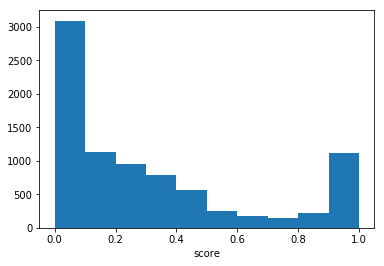

In [5]:
pl.hist(data)
pl.xlabel('score')
pl.show()

In [6]:
test = pd.read_json('/home/line290/Documents/kaggle/kaggle_lceberg_data/test.json')

In [8]:
print test.shape

(8424, 4)


In [9]:
X_test_angle = test['inc_angle']

In [10]:
print X_test_angle

0       34.966400
1       32.615072
2       37.505433
3       34.473900
4       43.918874
5       35.933020
6       42.414200
7       33.638300
8       41.107600
9       34.966400
10      35.782900
11      35.566871
12      33.185400
13      40.111298
14      39.698577
15      41.797300
16      43.603612
17      38.366264
18      44.988231
19      34.471800
20      44.678233
21      35.658800
22      35.408018
23      42.519800
24      45.247800
25      42.596474
26      45.366800
27      45.745633
28      44.066330
29      38.458900
          ...    
8394    36.630178
8395    37.349600
8396    40.945086
8397    45.768387
8398    45.017845
8399    43.134848
8400    31.436800
8401    41.859000
8402    42.291188
8403    38.125152
8404    39.461325
8405    30.585100
8406    39.225076
8407    38.825700
8408    43.679004
8409    37.259800
8410    38.153500
8411    46.326263
8412    38.020000
8413    40.644460
8414    39.234395
8415    43.107674
8416    41.858200
8417    45.963624
8418    45

In [33]:
print X_test_angle * 10000 - (X_test_angle * 10000).astype(int)

0       0.000000e+00
1       7.205174e-01
2       3.315936e-01
3       0.000000e+00
4       7.398322e-01
5       2.005384e-01
6       0.000000e+00
7       0.000000e+00
8       0.000000e+00
9       0.000000e+00
10      0.000000e+00
11      7.056232e-01
12      0.000000e+00
13      9.819995e-01
14      7.693824e-01
15      0.000000e+00
16      1.204060e-01
17      6.420883e-01
18      3.086330e-01
19      0.000000e+00
20      3.271721e-01
21      0.000000e+00
22      1.803924e-01
23      5.820766e-11
24      0.000000e+00
25      7.395732e-01
26      0.000000e+00
27      3.318188e-01
28      2.994139e-01
29      0.000000e+00
            ...     
8394    7.755964e-01
8395    0.000000e+00
8396    8.610651e-01
8397    8.738699e-01
8398    4.506833e-01
8399    4.805990e-01
8400    0.000000e+00
8401    0.000000e+00
8402    8.806092e-01
8403    5.210100e-01
8404    2.534785e-01
8405    0.000000e+00
8406    7.585628e-01
8407    0.000000e+00
8408    3.851151e-02
8409    0.000000e+00
8410    0.000

In [35]:
idx_true = np.where((X_test_angle * 10000 - (X_test_angle * 10000).astype(int)) == 0.0)

In [38]:
print idx_true[0].shape

(2950,)


In [37]:
a = data[idx_true[0]]
print a.shape, a

(2950,) 0       0.165616
3       0.998759
6       0.036051
7       0.999701
8       0.013392
9       0.000115
10      0.000329
12      0.072902
15      0.011654
19      0.870786
21      0.391090
24      0.000134
26      0.039736
29      0.964001
35      0.966989
36      0.181594
38      0.124073
39      0.574527
45      0.681734
46      0.989125
48      0.981256
52      0.984259
55      0.963685
56      0.062583
57      0.144132
62      0.995871
64      0.000196
66      0.056974
71      0.047659
73      0.997293
          ...   
8340    0.998462
8343    0.939900
8345    0.164660
8346    0.067900
8347    0.997077
8348    0.006238
8351    0.998747
8352    0.230981
8354    0.990603
8361    0.272851
8362    0.997781
8365    0.957182
8366    0.816077
8369    0.018586
8371    0.998233
8374    0.966260
8384    0.003656
8385    0.329691
8389    0.003649
8392    0.933846
8395    0.000329
8400    0.008261
8401    0.005340
8405    0.002009
8407    0.033623
8409    0.976057
8410    0.001084
8418  

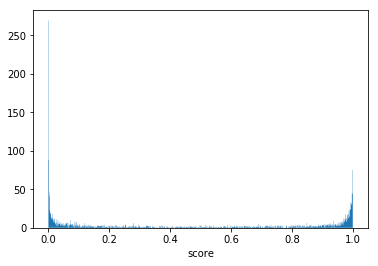

In [41]:
bins = np.arange(0., 1., 0.001) #浮点数版本的range
pl.hist(a, bins, histtype='stepfilled')
# pl.hist(a)
pl.xlabel('score')
pl.show()

In [46]:
train = pd.read_json('/home/line290/Documents/kaggle/kaggle_lceberg_data/train.json')
# print train['is_iceberg']
train_lable = train['is_iceberg']

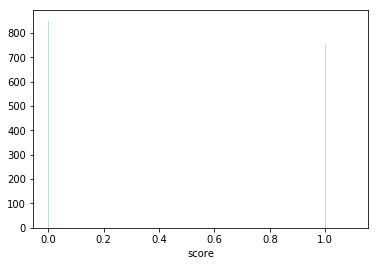

In [48]:
bins = np.arange(0., 1.1, 0.001) #浮点数版本的range
pl.hist(train_lable, bins, histtype='stepfilled')
# pl.hist(a)
pl.xlabel('score')
pl.show()